# Training Models

##### Common Imports

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

path = r'C:\Users\drjos\OneDrive\Desktop\Data Science Notes'

In [2]:
### Creating random data with noise around y=4+3x, domain [0,2]
X_l = 2*np.random.rand(100,1)   
y_l = 1 + 4*X_l + np.random.randn(100,1)

### Creating random data with noise around y=0.5x^2+x+2, domain [-3,3]
X_q = 6*np.random.rand(100,1) - 3
y_q = 0.5*X_q**2 + X_q + 2 + np.random.randn(100,1)

### Creating random data with noise around y=x^3+0.5x^2-1x+2, domain [-3,3]
X_t = 6*np.random.rand(100,1) - 3
y_t = X_t**3 + 0.5*X_t**2 - X_t + 2 + np.random.randn(100,1)**2

## Linear Regression
<h4 style="text-align: center;">$\hat{y} = \theta_0 + \displaystyle \sum_{i=1}^n \theta_i x_i = \vec{\theta} \cdot \vec{x}$ </h4>

- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $\theta_i$ is the model parameters with $\theta_0$ the bias term.
  >
</table>

### Mean Square Error
Cost function for a linear regression model.
<h4 style="text-align: center;"> $\text{MSE}(\theta) = \displaystyle\frac{1}{m}\sum_{i=1}^n \left(\theta^T x^{(i)} - y^{(i)} \right)^2$ </h4>

The **Normal Equation** is a closed-form solution to find the value $\theta$ that minimizes MSE.
<h4 style="text-align: center;"> $\theta = \left(X^T X\right)^{-1} X \,\,\vec{y}$ </h4>

### Batch Gradient Descent

**Note 1:** MSE for Linear Regression is convex, meaning there is a single local minimum that is the global minimum.

**Note 2:** BGD can be slow and complex because it uses the entire data set.

$$ \dfrac{\partial}{\partial \theta_j} = \dfrac{2}{m} \displaystyle\sum_{i=1}^m \left(\theta^T x^{(i)} - y^{(i)}\right) x_j^{(i)} \hskip 60pt \nabla_\theta \text{MSE}(\theta) = \dfrac{2}{m}\,X^T\left(X\theta - \hat{y}\right)$$

_Gradient Descent Step:_ $\hskip 15pt \theta^{(\text{next step})} = \theta - \eta\,\nabla_\theta \text{MSE}(\theta)$

### Stochastic Gradient Descent

**Note 1:** SGD only has one data value in memory at a time, an out-of-core algorithm. The descent isn't regular - which has advantages and disadvantages.

Linear Regression: Intercept 0.8967, Slope 4.1785
SGD Regression: Intercept 0.8977, Slope 4.1791


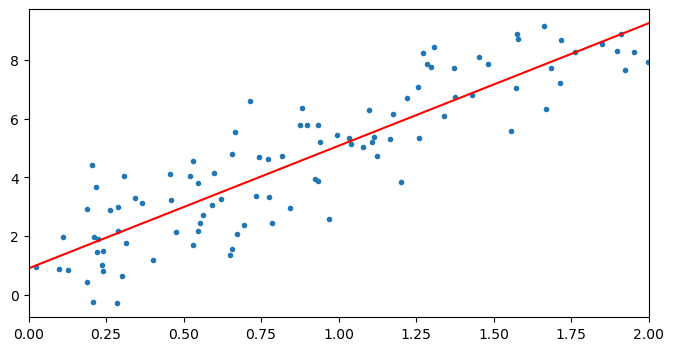

In [3]:
### SKLearn Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_l,y_l)
print("Linear Regression: Intercept %5.4f, Slope %5.4f" %(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

### SKLearn SGDRegression
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100)
sgd_reg.fit(X_l, y_l.ravel())  ### y.ravel() to reshape the y column
print("SGD Regression: Intercept %5.4f, Slope %5.4f" %(sgd_reg.intercept_[0], sgd_reg.coef_[0]))

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.set_xlim([0,2])
ax.scatter(X_l,y_l,s=9)
X_new = np.linspace(0,2,1000).reshape(-1, 1)  ### Reshape is critical for input
y_predict = lin_reg.predict(X_new)
ax.plot(X_new, y_predict, color='red')

## Polynomial Regression

SKLearn's **PolynomialFeatures** class transforms the data by adding a feature in the training set.

Linear Regression: Intercept 1.827, Coefficients [1.04007284 0.53263701]


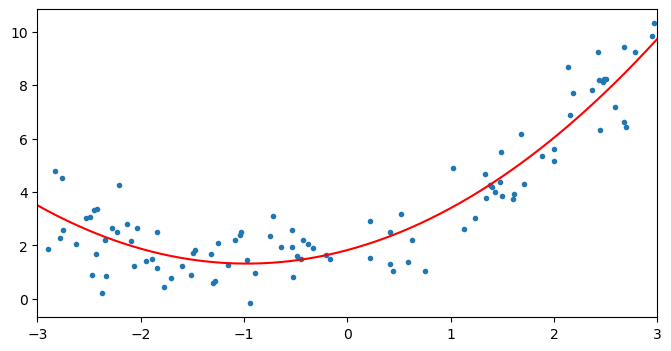

In [4]:
### Add feature for the square of X values
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_q)

### Run linear regression on the transformed data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_q)
print("Linear Regression: Intercept {0:5.3f}, Coefficients {1}".format(lin_reg.intercept_[0], lin_reg.coef_[0]))

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.set_xlim([-3,3])
ax.scatter(X_q,y_q,s=9)
X_new = np.linspace(-3,3,1000).reshape(-1, 1)  ### Reshape is critical for input
y_predict = lin_reg.intercept_[0] + lin_reg.coef_[0][0]*X_new + lin_reg.coef_[0][1]*X_new**2
ax.plot(X_new, y_predict, color='red')

Linear Regression: Intercept 3.043, Coefficients [-1.06915998  0.53565821  1.02461103]


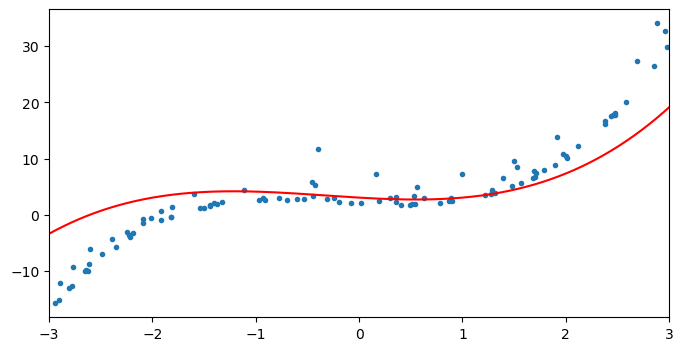

In [5]:
### Add feature for the square of X values
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_t)

### Run linear regression on the transformed data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_t)
print("Linear Regression: Intercept {0:5.3f}, Coefficients {1}".format(lin_reg.intercept_[0], lin_reg.coef_[0]))

fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.set_xlim([-3,3])
ax.scatter(X_t,y_t,s=9)
X_new = np.linspace(-3,3,1000).reshape(-1, 1)  ### Reshape is critical for input
y_predict = lin_reg.intercept_[0] + lin_reg.coef_[0][0]*X_new + lin_reg.coef_[0][1]*X_new**2 + lin_reg.coef_[0][1]*X_new**3
ax.plot(X_new, y_predict, color='red')

## Regularized Linear Models

A good way to reduce overfitting is to regularize the model: the fewer degrees of freedom it has, the harder it will be for it to verfit the data. For a linear model, regularization is typically achieved by constaining the weights of the model.

### Ridge Regression $\hskip 15pt$ ($l_2$ regularization)

A regularization term related to the $l_2$ norm is added to the cost function only during training. The aim is to keep the weights small while minimizing the cost function. **Note:** It is important to scale the data as ridge regression is sensitive to the scale of the input features.

_Ridge Regression Cost Function:_ $\hskip 25pt \text{MSE}(\theta) + \dfrac{\alpha}{m}\displaystyle\sum_{i=1}^n \theta_i^2 = \text{MSE}(\theta) + \dfrac{\alpha}{m}\left(||\vec{w}||_2\right)^2$

### Lasso Regression $\hskip 15pt$ ($l_1$ regularization)

A regulation term related to the $l_1$ norm is added to the cost function only during training. Tends to eliminate the weights of the least important features. In general, lasso automitically performs feature selection and outputs a sparse model with few nonzero feature weights.\
**Note:** Acronym for _least absolute shrinkage and selection operator regression_

_Lasso Regression Cost Function:_ $\hskip 25pt \text{MSE}(\theta) + 2\alpha\displaystyle\sum_{i=1}^n \left|\theta_i\right|$

### Elastic Net Regression

A weighted balance of both Ridge and Lasso Regressions using $0\leq r\leq 1$. If $r=0$ equivalent to Ridge Regression and if $r=1$ equivalent to Lasso Regression.

_Elastic Net Cost Function:_ $\hskip 48pt \text{MSE}(\theta) + 2r\alpha\displaystyle\sum_{i=1}^n \left|\theta_i\right| + (1-r)\dfrac{\alpha}{m}\displaystyle\sum_{i=1}^n$

In [6]:
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X_t, y_t)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_t, y_t)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_t, y_t)

ElasticNet(alpha=0.1)

## Logistic Regression

Good for binary classification as it estimates the probability that an instance belongs to a particular class. Similar to linear regression except the output is passed through the logistic function. Generally, the output of the logistic function is classified as positive if the logistic function returns a value greater than 0.5 and classified as negative if less than 0.5.\
**Note:** Assumes the instances follow a Gaussian distribution around the mean of their class.

_Logistic Function:_ $\hskip 50pt \sigma(t) = \dfrac{1}{1+e^{-t}}$

_Estimated Probability:_ $\hskip 50pt \hat{p} = \sigma\left(\theta^T \vec{x}\right)$

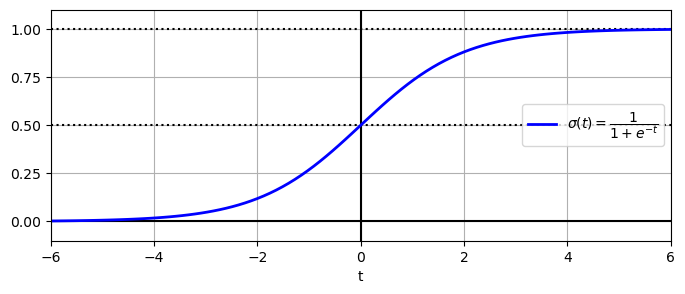

In [7]:
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="right")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

_Cost Function for Single Training Instance:_ $\hskip 25pt  c(\theta) = \left\{ \begin{array}{lr} -\log\left(\hat{p}\right) & \text{if } y=1 \\ -\log\left(1-\hat{p}\right) & \text{if } y=0 \\ \end{array} \right.$

_Logistic Regression Cost Function:_ $\hskip 25pt \dfrac{-1}{m} \displaystyle\sum_{i=1}^m \left[y^{(i)}\log\left(\hat{p}^{(i)}\right) + \left(1-y^{(i)}\right)\log\left(1-\hat{p}^{(i)}\right)\right]$

_Logistic Cost Function $j^{th}$ Partial Derivative:_ $\hskip 10pt \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left[\sigma\left(\theta^T\vec{x}^{(i)}\right)-y^{(i)}\right]\,x_j^{(i)}$

In [8]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)  ### C is the inverse of \alpha in logistic regularization
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

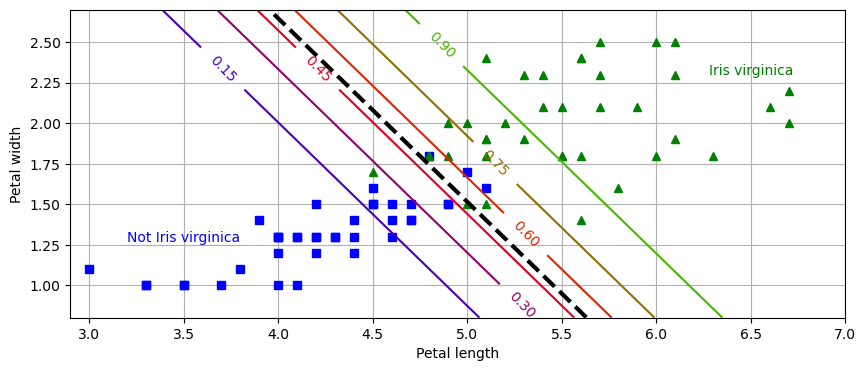

In [10]:

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

## Softmax Regression

Generalization of logistic regression to support multiple classification. Instead of the logistic function it uses the argmax of softmax functions applied to each class.\
**Note:** Classes _*must*_ be mutually exclusive.

_Softmax Function:_ $\hskip 30pt \sigma(\vec{z})_i = \dfrac{e^{z_i}}{e^{z_1} + \ldots + e^{z_K}}$

In [12]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30)
softmax_reg.fit(X_train, y_train)

softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

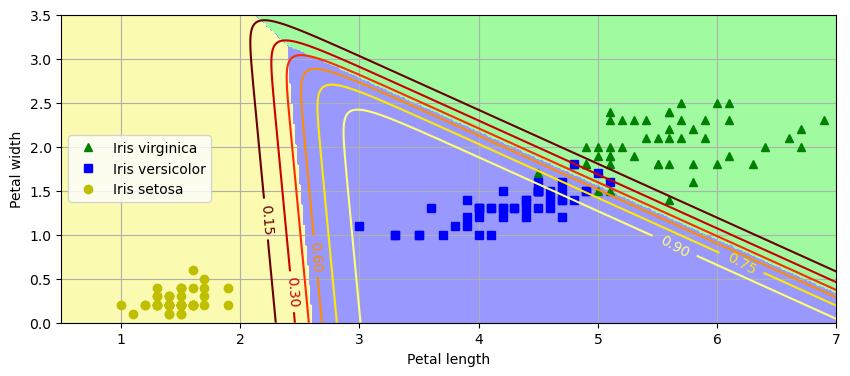

In [13]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()